In [1]:
import mne
import glob
import matplotlib.pyplot as plt
import numpy as np
# mne.viz.set_browser_backend('qt')
#%matplotlib qt

from datetime import datetime

In [2]:
project_path = "/project/def-emayada/q1k/experimental/hsj/"
pylossless_path = "derivatives/pylossless/"
postproc_path = "derivatives/postproc/"

In [3]:
conditions = ['ae06_d','ae40_d']
roi = ['E6']
freqs = np.arange(2, 90, 2)
decim = 2
n_cycles = freqs / 2

epoch_files = glob.glob(project_path + pylossless_path + postproc_path + 'epoch_fif_files/AEP/*epo.fif')
for item in epoch_files:
   print("[", item, "] ")

[ /project/def-emayada/q1k/experimental/hsj/derivatives/pylossless/derivatives/postproc/epoch_fif_files/AEP/sub-10083P_ses-01_task-AEP_run-1_eeg_epo.fif ] 
[ /project/def-emayada/q1k/experimental/hsj/derivatives/pylossless/derivatives/postproc/epoch_fif_files/AEP/sub-100111F1_ses-01_task-AEP_run-1_eeg_epo.fif ] 
[ /project/def-emayada/q1k/experimental/hsj/derivatives/pylossless/derivatives/postproc/epoch_fif_files/AEP/sub-100123P_ses-01_task-AEP_run-1_eeg_epo.fif ] 
[ /project/def-emayada/q1k/experimental/hsj/derivatives/pylossless/derivatives/postproc/epoch_fif_files/AEP/sub-100150M1_ses-01_task-AEP_run-1_eeg_epo.fif ] 
[ /project/def-emayada/q1k/experimental/hsj/derivatives/pylossless/derivatives/postproc/epoch_fif_files/AEP/sub-100119F1_ses-01_task-AEP_run-1_eeg_epo.fif ] 
[ /project/def-emayada/q1k/experimental/hsj/derivatives/pylossless/derivatives/postproc/epoch_fif_files/AEP/sub-100114S2_ses-01_task-AEP_run-1_eeg_epo.fif ] 
[ /project/def-emayada/q1k/experimental/hsj/derivatives

In [4]:
averaging_dict = {labels:[] for labels in conditions}
for filepath in epoch_files:
    print(filepath)
    new_epoch = mne.read_epochs(filepath)
    # the following is to select the first 50% of epochs
    #nepochs = len(new_epoch)
    #print("NTrials = " + str(nepochs))
    #trial_cap = round(nepochs/2)
    #print("trial cap = " + str(trial_cap))
    #new_epoch = new_epoch[:trial_cap]
    for condition in conditions:
        power, itc = mne.time_frequency.tfr_morlet(new_epoch[condition].pick(roi), n_cycles=n_cycles, return_itc=True, freqs=freqs, decim=decim)
        averaging_dict[condition].append((new_epoch[condition].average(), power, itc))

/project/def-emayada/q1k/experimental/hsj/derivatives/pylossless/derivatives/postproc/epoch_fif_files/AEP/sub-10083P_ses-01_task-AEP_run-1_eeg_epo.fif
Reading /project/def-emayada/q1k/experimental/hsj/derivatives/pylossless/derivatives/postproc/epoch_fif_files/AEP/sub-10083P_ses-01_task-AEP_run-1_eeg_epo.fif ...
    Found the data of interest:
        t =   -1000.00 ...    2000.00 ms
        0 CTF compensation matrices available
Not setting metadata
61 matching events found
No baseline correction applied
0 projection items activated
NOTE: tfr_morlet() is a legacy function. New code should use .compute_tfr(method="morlet").
NOTE: tfr_morlet() is a legacy function. New code should use .compute_tfr(method="morlet").
/project/def-emayada/q1k/experimental/hsj/derivatives/pylossless/derivatives/postproc/epoch_fif_files/AEP/sub-100111F1_ses-01_task-AEP_run-1_eeg_epo.fif
Reading /project/def-emayada/q1k/experimental/hsj/derivatives/pylossless/derivatives/postproc/epoch_fif_files/AEP/sub-100111

Working on:  ae06_d
Identifying common channels ...


<Evoked | 'Grand average (n = 61)' (average, N=61), -1 – 2 s, baseline -1 – 0 s, 129 ch, ~3.1 MB>

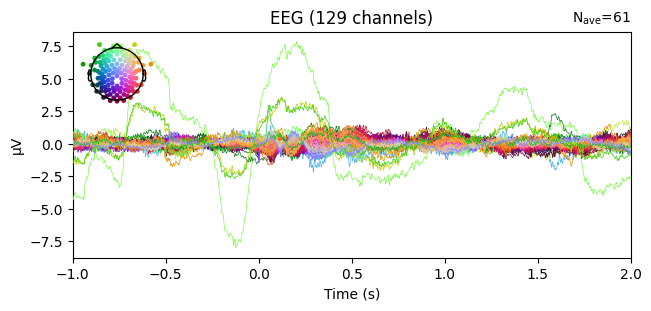

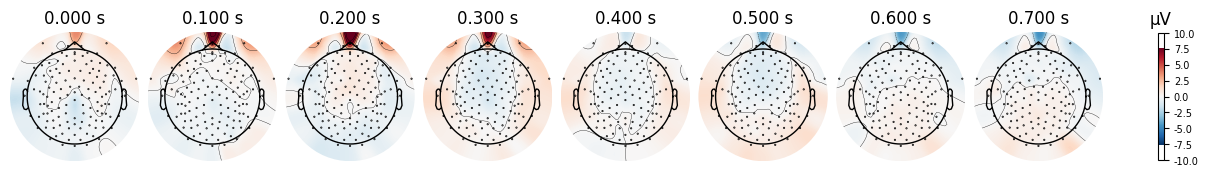

Working on:  ae40_d
Identifying common channels ...


<Evoked | 'Grand average (n = 61)' (average, N=61), -1 – 2 s, baseline -1 – 0 s, 129 ch, ~3.1 MB>

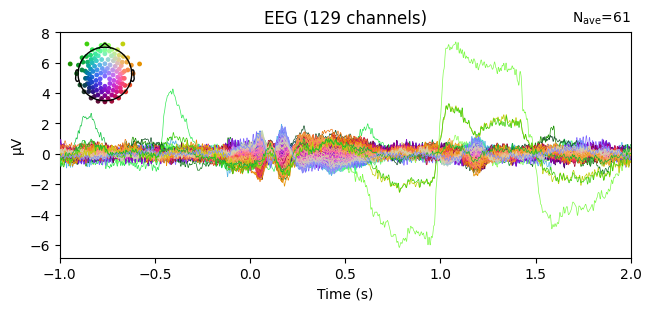

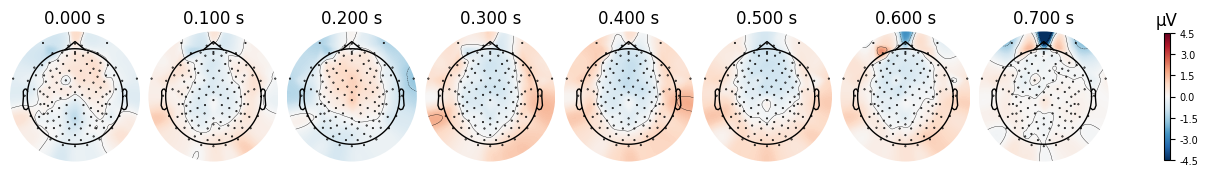

In [5]:
def condition_summary(condition_label):
    print('Working on: ', condition_label)
    grand_average = mne.grand_average([item[0] for item in averaging_dict[condition_label]])
    display(grand_average)
    grand_average.plot()
    times = np.arange(0, 0.8, .1)
    fig = grand_average.plot_topomap(times=times, colorbar=True)
    fig.suptitle(condition_label)

for condition in conditions:
    condition_summary(condition)

combining channels using "mean"


/tmp/ipykernel_206845/801076281.py:9: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  mne.viz.plot_compare_evokeds(evokeds,


combining channels using "mean"


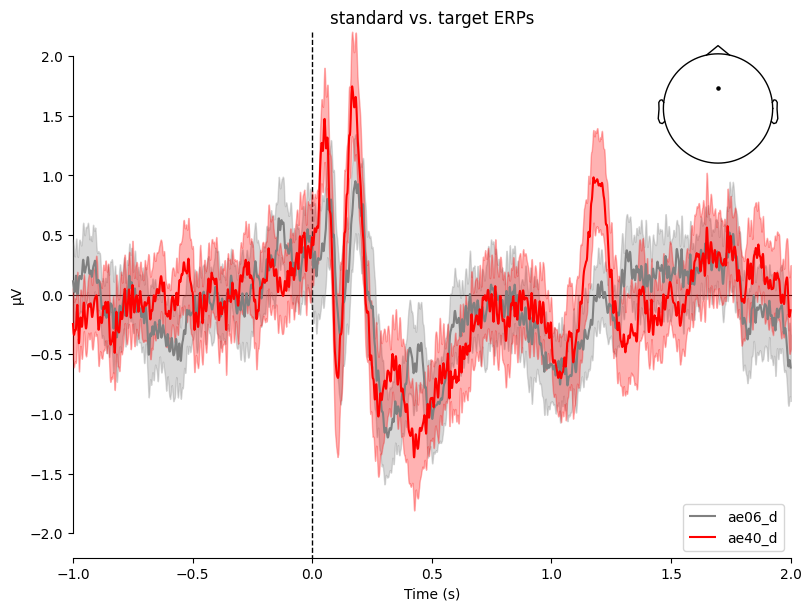

[<Figure size 800x600 with 2 Axes>]

In [6]:
color_dict = {'ae40_d':'blue', 'ae40_d':'red'}
linestyle_dict = {'ae06_d':'-', 'ae06_d':'-'}

evokeds = {
    'ae06_d': [item[0] for item in averaging_dict['ae06_d']],
    'ae40_d': [item[0] for item in averaging_dict['ae40_d']],
}

mne.viz.plot_compare_evokeds(evokeds,
                             combine='mean',
                             legend='lower right',
                             picks=roi, show_sensors='upper right',
                             colors=color_dict,
                             linestyles=linestyle_dict,
                             title='standard vs. target ERPs'
                            )

In [7]:
# True for ERSP, False for ITC
def do_power_plotting(ersp=True):
    indexer = 1 if ersp else 2
    cond1 = mne.grand_average([item[indexer] for item in averaging_dict['ae06_d']])
    cond2 = mne.grand_average([item[indexer] for item in averaging_dict['ae40_d']])

    epochs_power_1 = np.array([item[indexer].data for item in averaging_dict['ae06_d']])[:, 0, :, :]
    epochs_power_2 = np.array([item[indexer].data for item in averaging_dict['ae40_d']])[:, 0, :, :]


    #times = 1e3 * epochs_power_1.times  # change unit to ms
    times = 1e3 * averaging_dict['ae06_d'][0][1].times
    fig1, (ax1t, ax1b) = plt.subplots(2, 1, figsize=(6, 4))
    fig1.subplots_adjust(0.12, 0.08, 0.96, 0.94, 0.2, 0.43)

    ax1t.imshow(
        epochs_power_1.mean(axis=0),
        extent=[times[0], times[-1], freqs[0], freqs[-1]],
        aspect="auto",
        origin="lower",
        cmap="RdBu_r",
    )

    ax1b.imshow(
        epochs_power_2.mean(axis=0),
        extent=[times[0], times[-1], freqs[0], freqs[-1]],
        aspect="auto",
        origin="lower",
        cmap="RdBu_r",
    )

    ax1t.set_ylabel("Frequency (Hz)")
    ax1t.set_title(f"06Hz sound")
    ax1b.set_title(f"40Hz sound")
    ax1b.set_xlabel("Time (ms)")


    F_obs, clusters, cluster_p_values, H0 = mne.stats.permutation_cluster_test(
        [epochs_power_1, epochs_power_2],
        out_type="mask",
        n_permutations=100,
        threshold=6.0,
        tail=0,
    ) # returns F difference, sampled, zscore

    # Grab any ERSP type timing window and use it to scale to ms
    times = 1e3 * averaging_dict['ae06_d'][0][1].times

    evoked_power_contrast = epochs_power_1.mean(axis=0) - epochs_power_2.mean(axis=0)
    signs = np.sign(evoked_power_contrast)

    F_obs_plot = np.nan * np.ones_like(F_obs)
    for c, p_val in zip(clusters, cluster_p_values):
        if p_val <= 0.05:
            F_obs_plot[c] = F_obs[c] * signs[c]
    max_F = np.nanmax(abs(F_obs_plot))

    fig, (ax, ax2) = plt.subplots(2, 1, figsize=(6, 4))
    ax.imshow(
        F_obs,
        extent=[times[0], times[-1], freqs[0], freqs[-1]],
        aspect="auto",
        origin="lower",
        cmap="gray",
    )

    ax.imshow(
        F_obs_plot,
        extent=[times[0], times[-1], freqs[0], freqs[-1]],
        aspect="auto",
        origin="lower",
        cmap="RdBu_r",
        vmin=-max_F,
        vmax=max_F,
    )
    ax.set_xlabel("Time (ms)")
    ax.set_ylabel("Frequency (Hz)")
    ax.set_title("06Hz - 40Hz")

    evoked_contrast = mne.combine_evoked(
        [cond1, cond2], weights=[1, -1]
    )
    evoked_contrast.plot(axes=ax2)

ERSP
Identifying common channels ...
Identifying common channels ...
stat_fun(H1): min=2.6360937757437462e-11 max=2.1582269503669003
Running initial clustering …
Found 0 clusters
No baseline correction applied


/tmp/ipykernel_206845/2222166138.py:38: RuntimeWarning: No clusters found, returning empty H0, clusters, and cluster_pv
  F_obs, clusters, cluster_p_values, H0 = mne.stats.permutation_cluster_test(
/tmp/ipykernel_206845/2222166138.py:56: RuntimeWarning: All-NaN slice encountered
  max_F = np.nanmax(abs(F_obs_plot))


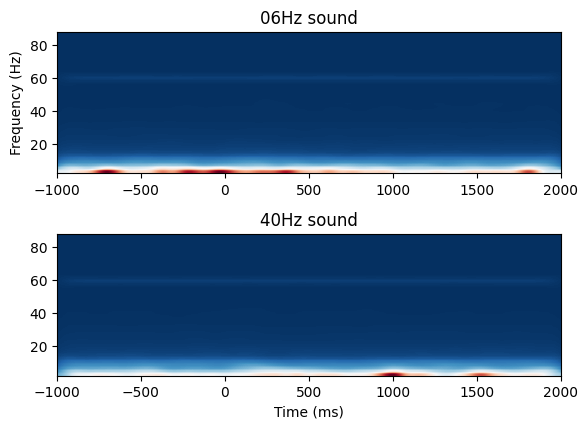

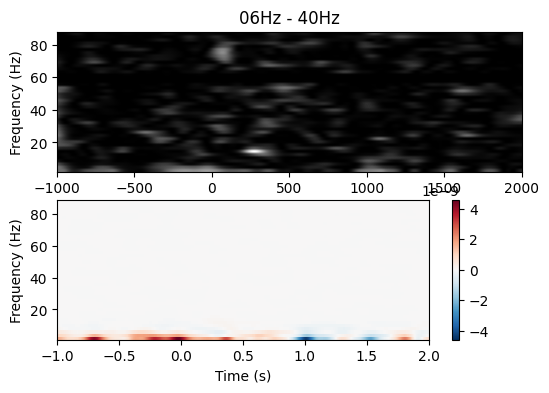

ITC
Identifying common channels ...
Identifying common channels ...
stat_fun(H1): min=2.0309192369182547e-11 max=25.819243580355273
Running initial clustering …
Found 46 clusters


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

No baseline correction applied


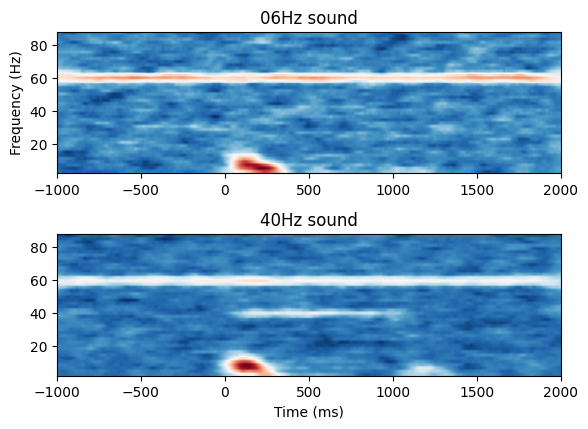

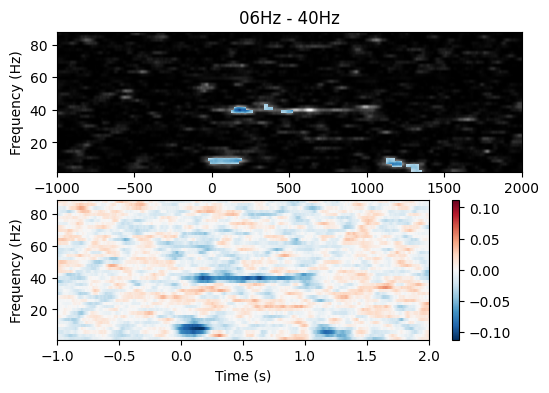

In [8]:
print('ERSP')
do_power_plotting(ersp=True)
print('ITC')
do_power_plotting(ersp=False)

In [ ]:
#dt_str = datetime.now().strftime("%Y%m%d_%H%M%S")
#!jupyter nbconvert --output {"group_reports/group_AEP_ERP_TF_" + dt_str ".html"} --TagRemovePreprocessor.remove_all_outputs_tags='{"exclude"}' --no-input --to html group_erp_tf_ap.ipynb